# Movie Genre Classification: Model Designing

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

## Loading cleaned dataset

In [35]:
data = pd.read_csv("./datasets/cleaned_data.csv")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54213 non-null  object
 1   genre        54213 non-null  int64 
 2   description  54213 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


## Train test split

In [37]:
train_df, test_val_df = train_test_split(data, test_size = .15, stratify = data["genre"])

test_df, val_df = train_test_split(test_val_df, test_size = .5, stratify = test_val_df["genre"])

In [38]:
train_df.shape, test_df.shape, val_df.shape

((46081, 3), (4066, 3), (4066, 3))

## Building Vectorizer

In [39]:
num_wordss = 50000
max_len = 250
tokenizer = Tokenizer(num_words = num_wordss, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True)

In [40]:
tokenizer.fit_on_texts(train_df["description"].values)

## Text Vectorization (TF-IDF)

In [41]:
X = tokenizer.texts_to_sequences(train_df["description"].values)
X = pad_sequences(X, maxlen=max_len)
y = train_df["genre"]

X_test = tokenizer.texts_to_sequences(test_df['description'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = test_df['genre'].values

In [42]:
y_test

array([ 7,  8,  5, ...,  7, 13,  7], dtype=int64)

## Building Long Short-Term Memory Networks

In [43]:
model = Sequential([
    Embedding(num_wordss, 100, input_length = X.shape[1]),
    SpatialDropout1D(.2),
    LSTM(100, dropout = .1, recurrent_dropout = .2),
    Dense(27, activation = "softmax")
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Model

In [44]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/6
1441/1441 [==============================] - 342s 235ms/step - loss: 1.9970 - accuracy: 0.4240 - val_loss: 1.6844 - val_accuracy: 0.5165
Epoch 2/6
1441/1441 [==============================] - 328s 228ms/step - loss: 1.4228 - accuracy: 0.5907 - val_loss: 1.5347 - val_accuracy: 0.5524
Epoch 3/6
1441/1441 [==============================] - 330s 229ms/step - loss: 1.0669 - accuracy: 0.6938 - val_loss: 1.6062 - val_accuracy: 0.5526
Epoch 4/6
1441/1441 [==============================] - 337s 234ms/step - loss: 0.7859 - accuracy: 0.7726 - val_loss: 1.7832 - val_accuracy: 0.5334


## Plotting Accuracy & Loss

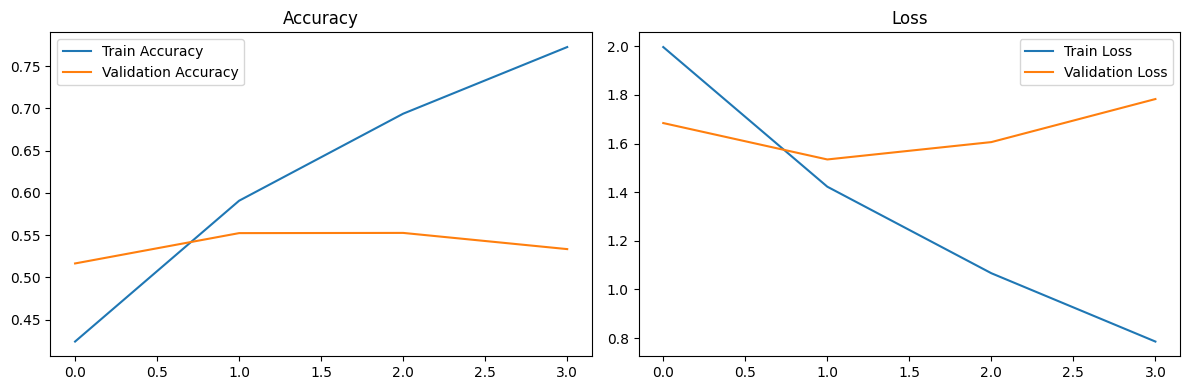

In [46]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()